In [ ]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# load dataset
data = pd.read_csv('/content/heart_disease_data.csv')

#### I would like to explain the features contain in the dataset

-HeartDisease\
Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

-BMI\
Body Mass Index (BMI)

-Smoking\
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

-AlcoholDrinking\
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

-Stroke\
(Ever told) (you had) a stroke?

-PhysicalHealth\
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

-MentalHealth\
Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

-DiffWalking\
Do you have serious difficulty walking or climbing stairs?

-Sex\
Are you male or female?

-AgeCategory\
Fourteen-level age category

-Race\
Imputed race/ethnicity value

-Diabetic\
(Ever told) (you had) diabetes?

-PhysicalActivity\
Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

-GenHealth\
Would you say that in general your health is...

-SleepTime\
On average, how many hours of sleep do you get in a 24-hour period?

-Asthma\
(Ever told) (you had) asthma?

-KidneyDisease\
Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

-SkinCancer\
(Ever told) (you had) skin cancer?

In [ ]:
# check the first 5 rows
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# check the shape of data
data.shape

(319795, 18)

In [ ]:
# get more information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# check numerical columns in dataframe
data._get_numeric_data().columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [ ]:
# check categorical columns in dataframe
data.select_dtypes(include=['object']).columns.tolist()

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [ ]:
# check the ratio of Heart Disease
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

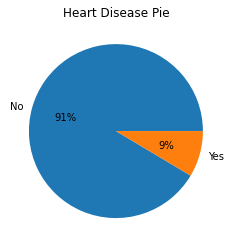

In [ ]:
plt.pie(data['HeartDisease'].value_counts(), labels = data['HeartDisease'].value_counts().index,\
                     data = data, autopct='%.0f%%')
plt.title(f"Heart Disease Pie")
plt.show()

In [ ]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
# check for duplicated data
data.duplicated().sum()

18078

In [ ]:
# check null values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
# remove duplicate values and keep only the first one
data.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# check for duplicated data
data.duplicated().sum()

0

As a conclusion:\
There are no null values or duplicated values

# Plotting data to extract some insights

## Plotting correlations line between data

In [ ]:
def sns_corr_lines(x_axis_data, y_axis_data, data):
    '''
    Inputs parameters- takes x_axis_data as a list of x axis, y_axis_data as a list of y axis, data as dataframe.
    Returns- plots lines that describe the correlation between features of data using seaborn library.
    '''
    i_sub= int(np.ceil((len(x_axis_data) + len(y_axis_data))/2))
    j_sub= 3
    # create blank figure
    fig, ax = plt.subplots(i_sub, j_sub, figsize= (15, 15))
    # initialize subplots indexes values
    i=0; j= 0
    for x_axis in x_axis_data:
        for y_axis in y_axis_data:
            # check if the axes are equivalent
            if x_axis == y_axis:
                continue
            else:
                # plot line using seaborn
                sns.lineplot(x= x_axis, y= y_axis, data= data, ax= ax[i, j])
                ax[i, j].set_title(f"{x_axis} and {y_axis} correlation")
                # set x and y labels
                ax[i, j].set_xlabel(x_axis)
                ax[i, j].set_ylabel(y_axis)
                # check and update indexes
                if j == j_sub-1:
                    j = 0
                    i += 1
                else:
                    j += 1
    # add results
    text= '''Conclusion:
    -There is some (not too strong) positive and negative correlation not persistence \nbetween Body Mass Index and Physical Health.
    -There is some (not too strong) positive and negative correlation \nbetween Body Mass Index and Mental Health.
    -There is very low correlation \n between Body Mass Index and Sleep Time.
    -There is a positive correlation \n between Physical Health and Mental Health correlation.
    -There is a low correlation close to the negative correlation \n between Physical Health and Sleep Time correlation.
    -There is low correlation \n between Mental Health and Sleep Time correlation.
    '''
    plt.gcf().text(0.3, -0.15, s = text, style ='italic',\
                  size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
    # adjust height space
    plt.subplots_adjust(wspace= 0.4, hspace = 0.4)
    return None

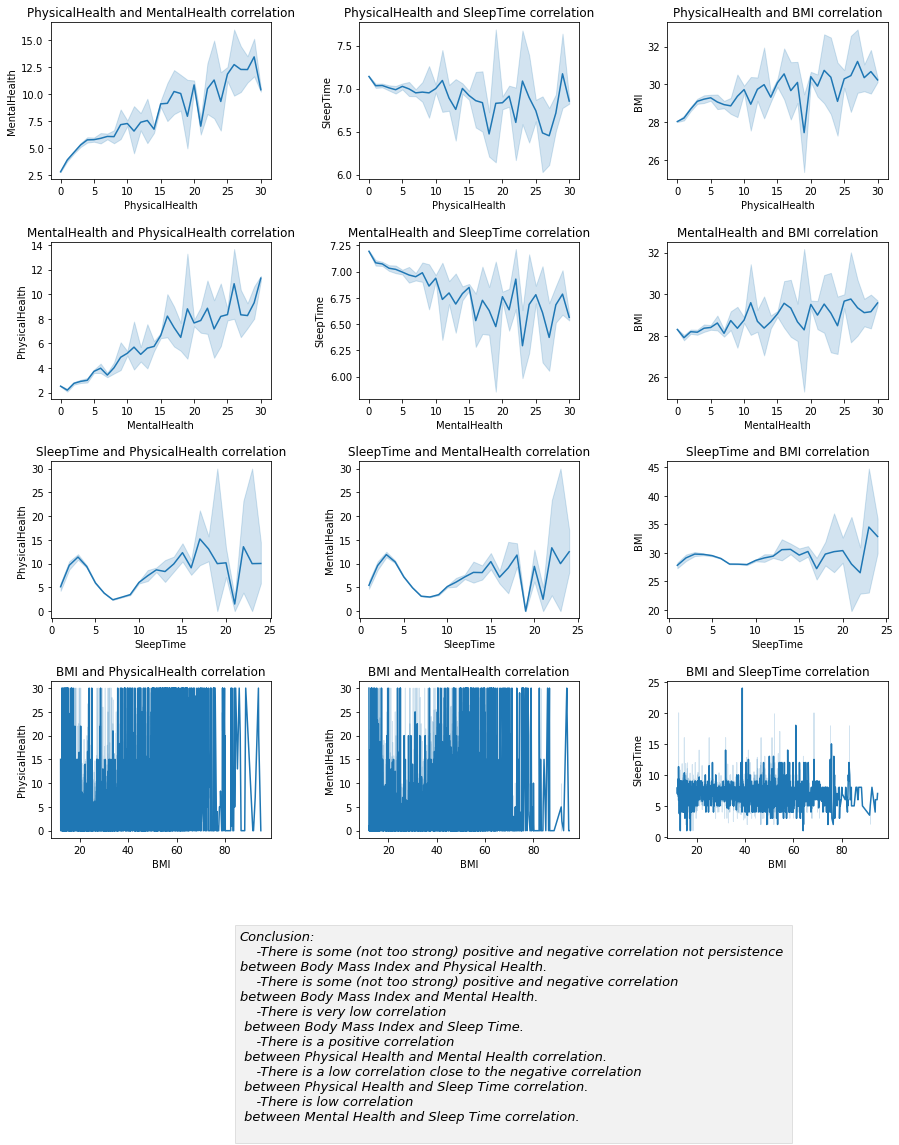

In [ ]:
x_axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
y_axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
sns_corr_lines(x_axis_data, y_axis_data, data)
plt.show()

## Plotting correlations  between categorical data

### Plotting histogram of data distribution

<Figure size 432x288 with 0 Axes>

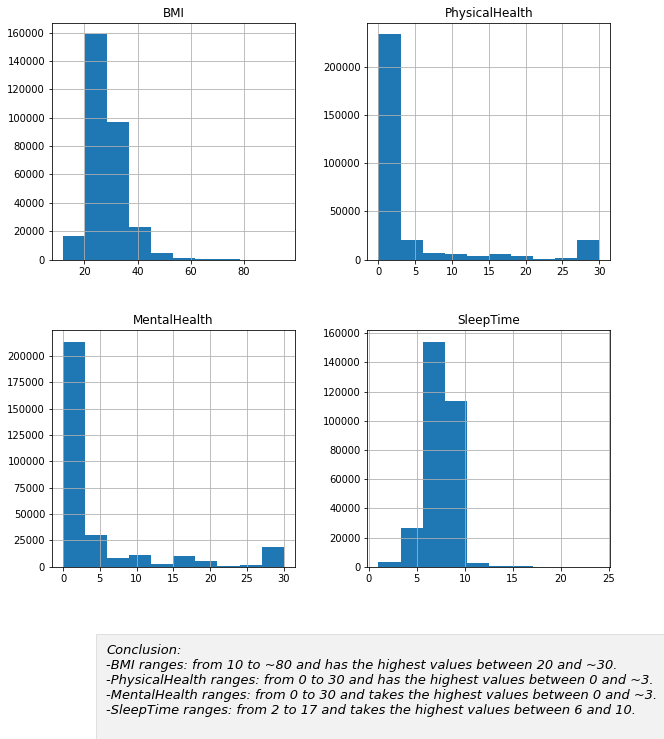

In [ ]:
# create blank figure
fig= plt.figure()

# plot hist using matplotlib for all numerical data
data.hist(figsize=(10, 10))

# add results
text= '''Conclusion:
-BMI ranges: from 10 to ~80 and has the highest values between 20 and ~30.
-PhysicalHealth ranges: from 0 to 30 and has the highest values between 0 and ~3.
-MentalHealth ranges: from 0 to 30 and takes the highest values between 0 and ~3.
-SleepTime ranges: from 2 to 17 and takes the highest values between 6 and 10.
'''
# set text bellow the plot
plt.gcf().text(0.2, -0.1,\
         s = text,\
            size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})
plt.show()

### Plotting countplot of categorical data to view its effect on Heart Disease

In [ ]:
def sns_count_plot(x_axis_data, y_axis_data, data, figsize= (13, 13)):
    '''
    Inputs parameters- takes x_axis_data as a list of x axis, y_axis_data as a list of y axis, data as dataframe, and figsize as tuple.
    Returns- plots countplot and pie plot that describe the correlation between features about data using seaborn library.
    '''
    i_sub= int(len(x_axis_data))
    j_sub= 3
    # create blank figure
    fig, ax = plt.subplots(i_sub, j_sub, figsize= figsize)
    # initialize subplots index values
    i=0; j= 0
    for x_axis in x_axis_data:
        # plot countplot using seaborn
        sns.countplot(x= x_axis, data= data, ax= ax[i, j])
        ax[i, j].set_title(f"{x_axis}, {y_axis_data} correlation")
        # set x and y labels
        ax[i, j].set_xlabel(x_axis)
        # move to the next subplot
        j += 1
        # define Seaborn color palette to use
        palette_color = sns.color_palette('bright')
        # plotting data on chart
        ax[i, j].pie(data[data[y_axis_data] == "Yes"][x_axis].value_counts(), labels = data[data[y_axis_data] == 'Yes'][x_axis].value_counts().index,\
                     data = data, colors = palette_color, autopct='%.0f%%')
        ax[i, j].set_title(f"Pie of people had Heart Disease")
        # move to next subplot
        j += 1
        ax[i, j].pie(data[data[y_axis_data] == "No"][x_axis].value_counts(), labels = data[data[y_axis_data] == 'No'][x_axis].value_counts().index,\
                     data = data, colors = palette_color, autopct='%.0f%%')
        ax[i, j].set_title(f"Pie of people had not Heart Disease")
        # check and update indexes
        if j == j_sub - 1:
            j = 0
            i += 1
        else:
            j += 1
    # adjust space
    plt.tight_layout()
    return None

### To better understand of these bigger data I split the figures

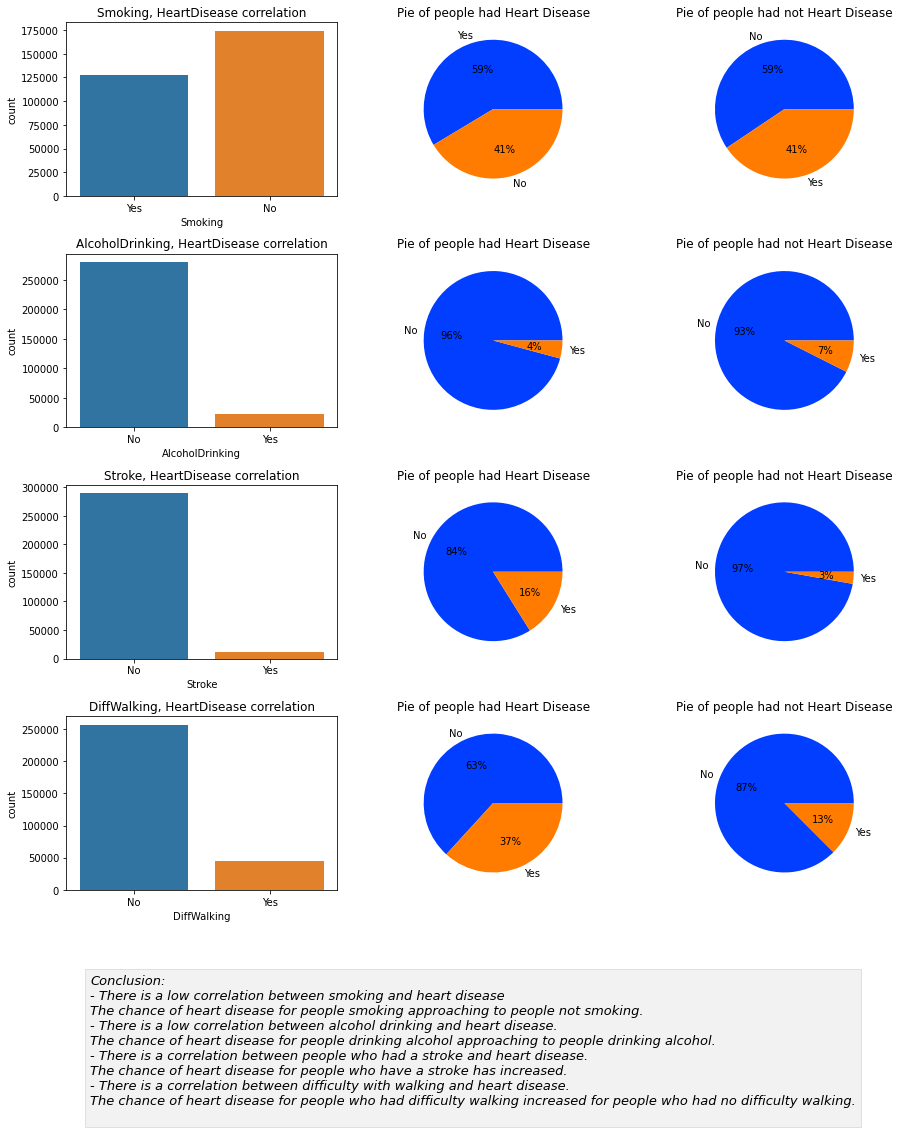

In [ ]:
x_axis_data = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking'] 
y_axis_data = 'HeartDisease'
sns_count_plot(x_axis_data, y_axis_data, data)
# add results
text= '''Conclusion:
- There is a low correlation between smoking and heart disease\nThe chance of heart disease for people smoking approaching to people not smoking.
- There is a low correlation between alcohol drinking and heart disease.\nThe chance of heart disease for people drinking alcohol approaching to people drinking alcohol.
- There is a correlation between people who had a stroke and heart disease.\nThe chance of heart disease for people who have a stroke has increased.
- There is a correlation between difficulty with walking and heart disease.\nThe chance of heart disease for people who had difficulty walking increased for people who had no difficulty walking.
'''
plt.gcf().text(0.1, -0.2, s = text, style ='italic',\
          size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
plt.show()

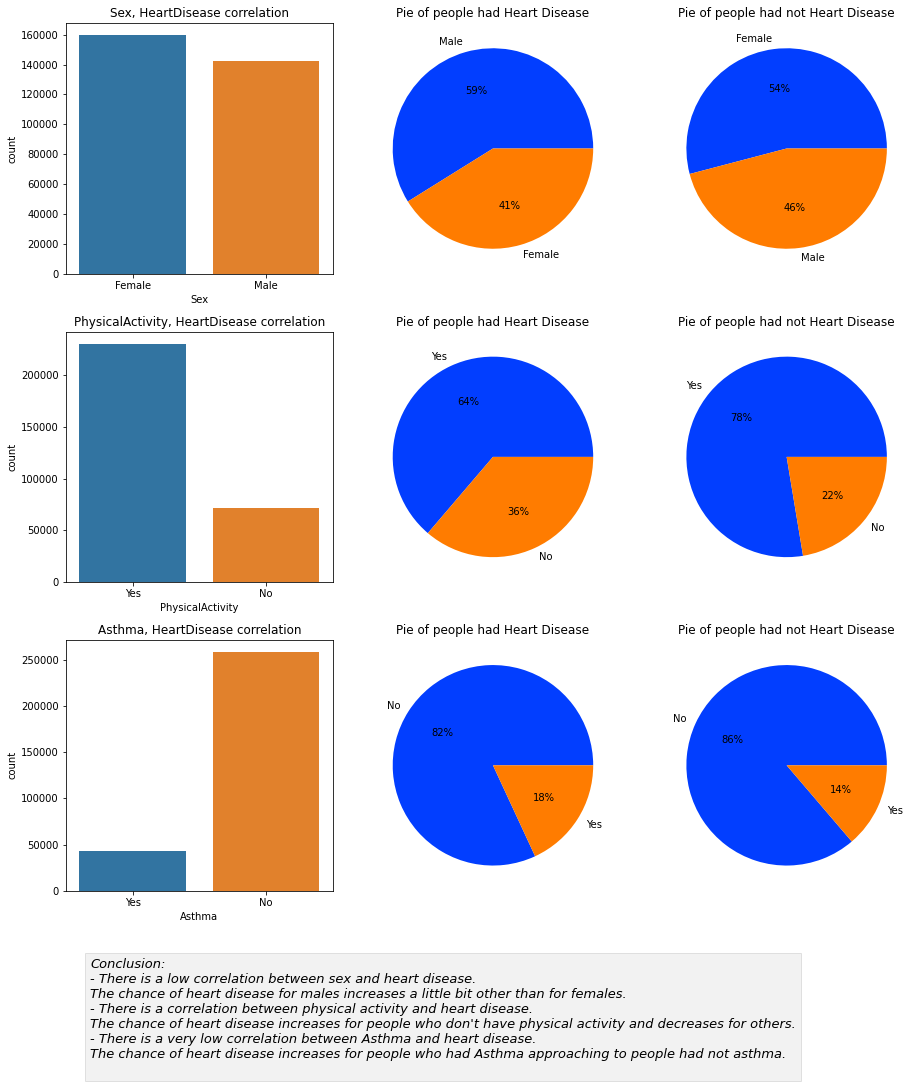

In [ ]:
x_axis_data = ['Sex','PhysicalActivity', 'Asthma']
sns_count_plot(x_axis_data, y_axis_data, data)
# add results
text= '''Conclusion:
- There is a low correlation between sex and heart disease.\nThe chance of heart disease for males increases a little bit other than for females.
- There is a correlation between physical activity and heart disease. \nThe chance of heart disease increases for people who don't have physical activity and decreases for others.
- There is a very low correlation between Asthma and heart disease. \nThe chance of heart disease increases for people who had Asthma approaching to people had not asthma.
'''
plt.gcf().text(0.1, -0.15, s = text, style ='italic',\
          size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
plt.show()

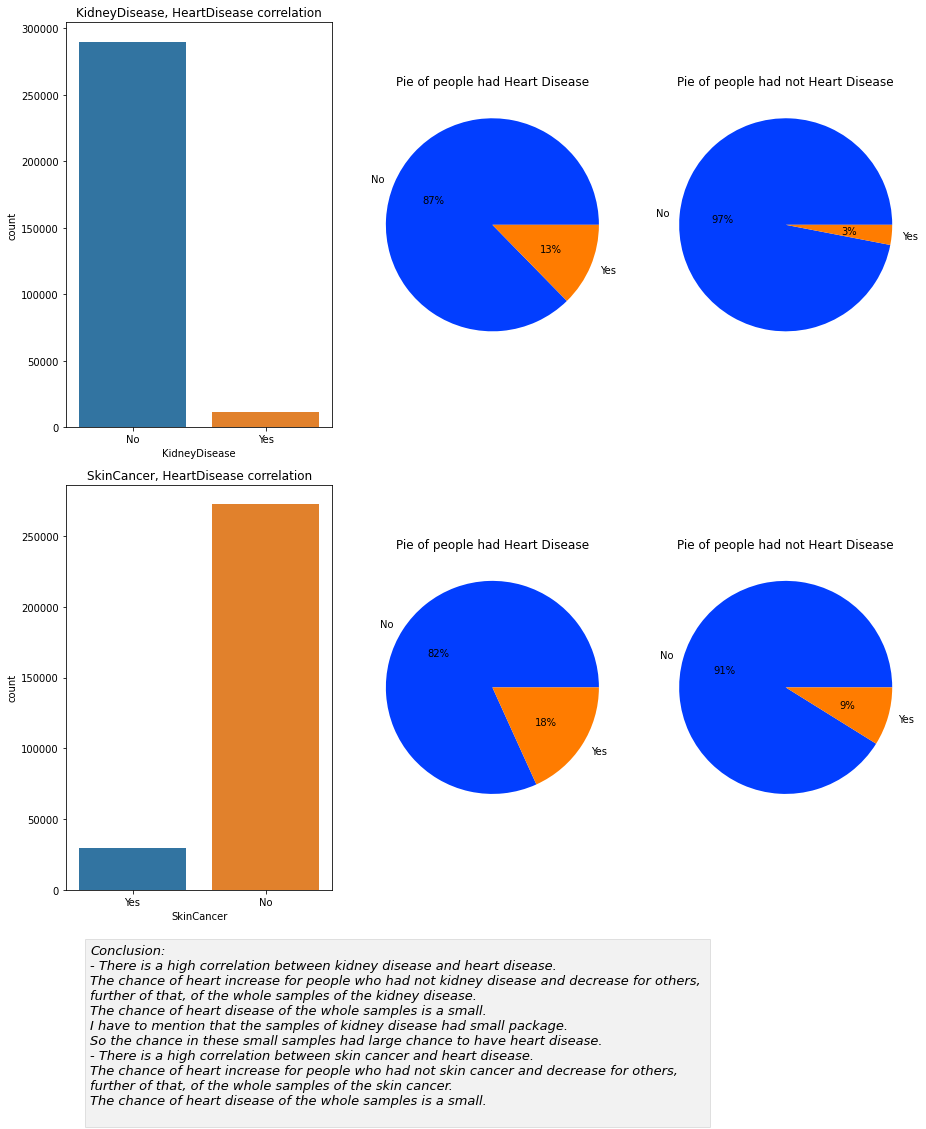

In [ ]:
x_axis_data = ['KidneyDisease', 'SkinCancer']
sns_count_plot(x_axis_data, y_axis_data, data)
# add results
text= '''Conclusion:
- There is a high correlation between kidney disease and heart disease.\nThe chance of heart increase for people who had not kidney disease and decrease for others, \nfurther of that, of the whole samples of the kidney disease.\nThe chance of heart disease of the whole samples is a small. \nI have to mention that the samples of kidney disease had small package. \nSo the chance in these small samples had large chance to have heart disease.
- There is a high correlation between skin cancer and heart disease. \nThe chance of heart increase for people who had not skin cancer and decrease for others, \nfurther of that, of the whole samples of the skin cancer.\nThe chance of heart disease of the whole samples is a small.
'''
plt.gcf().text(0.1, -0.2, s = text, style ='italic',\
          size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
plt.show()

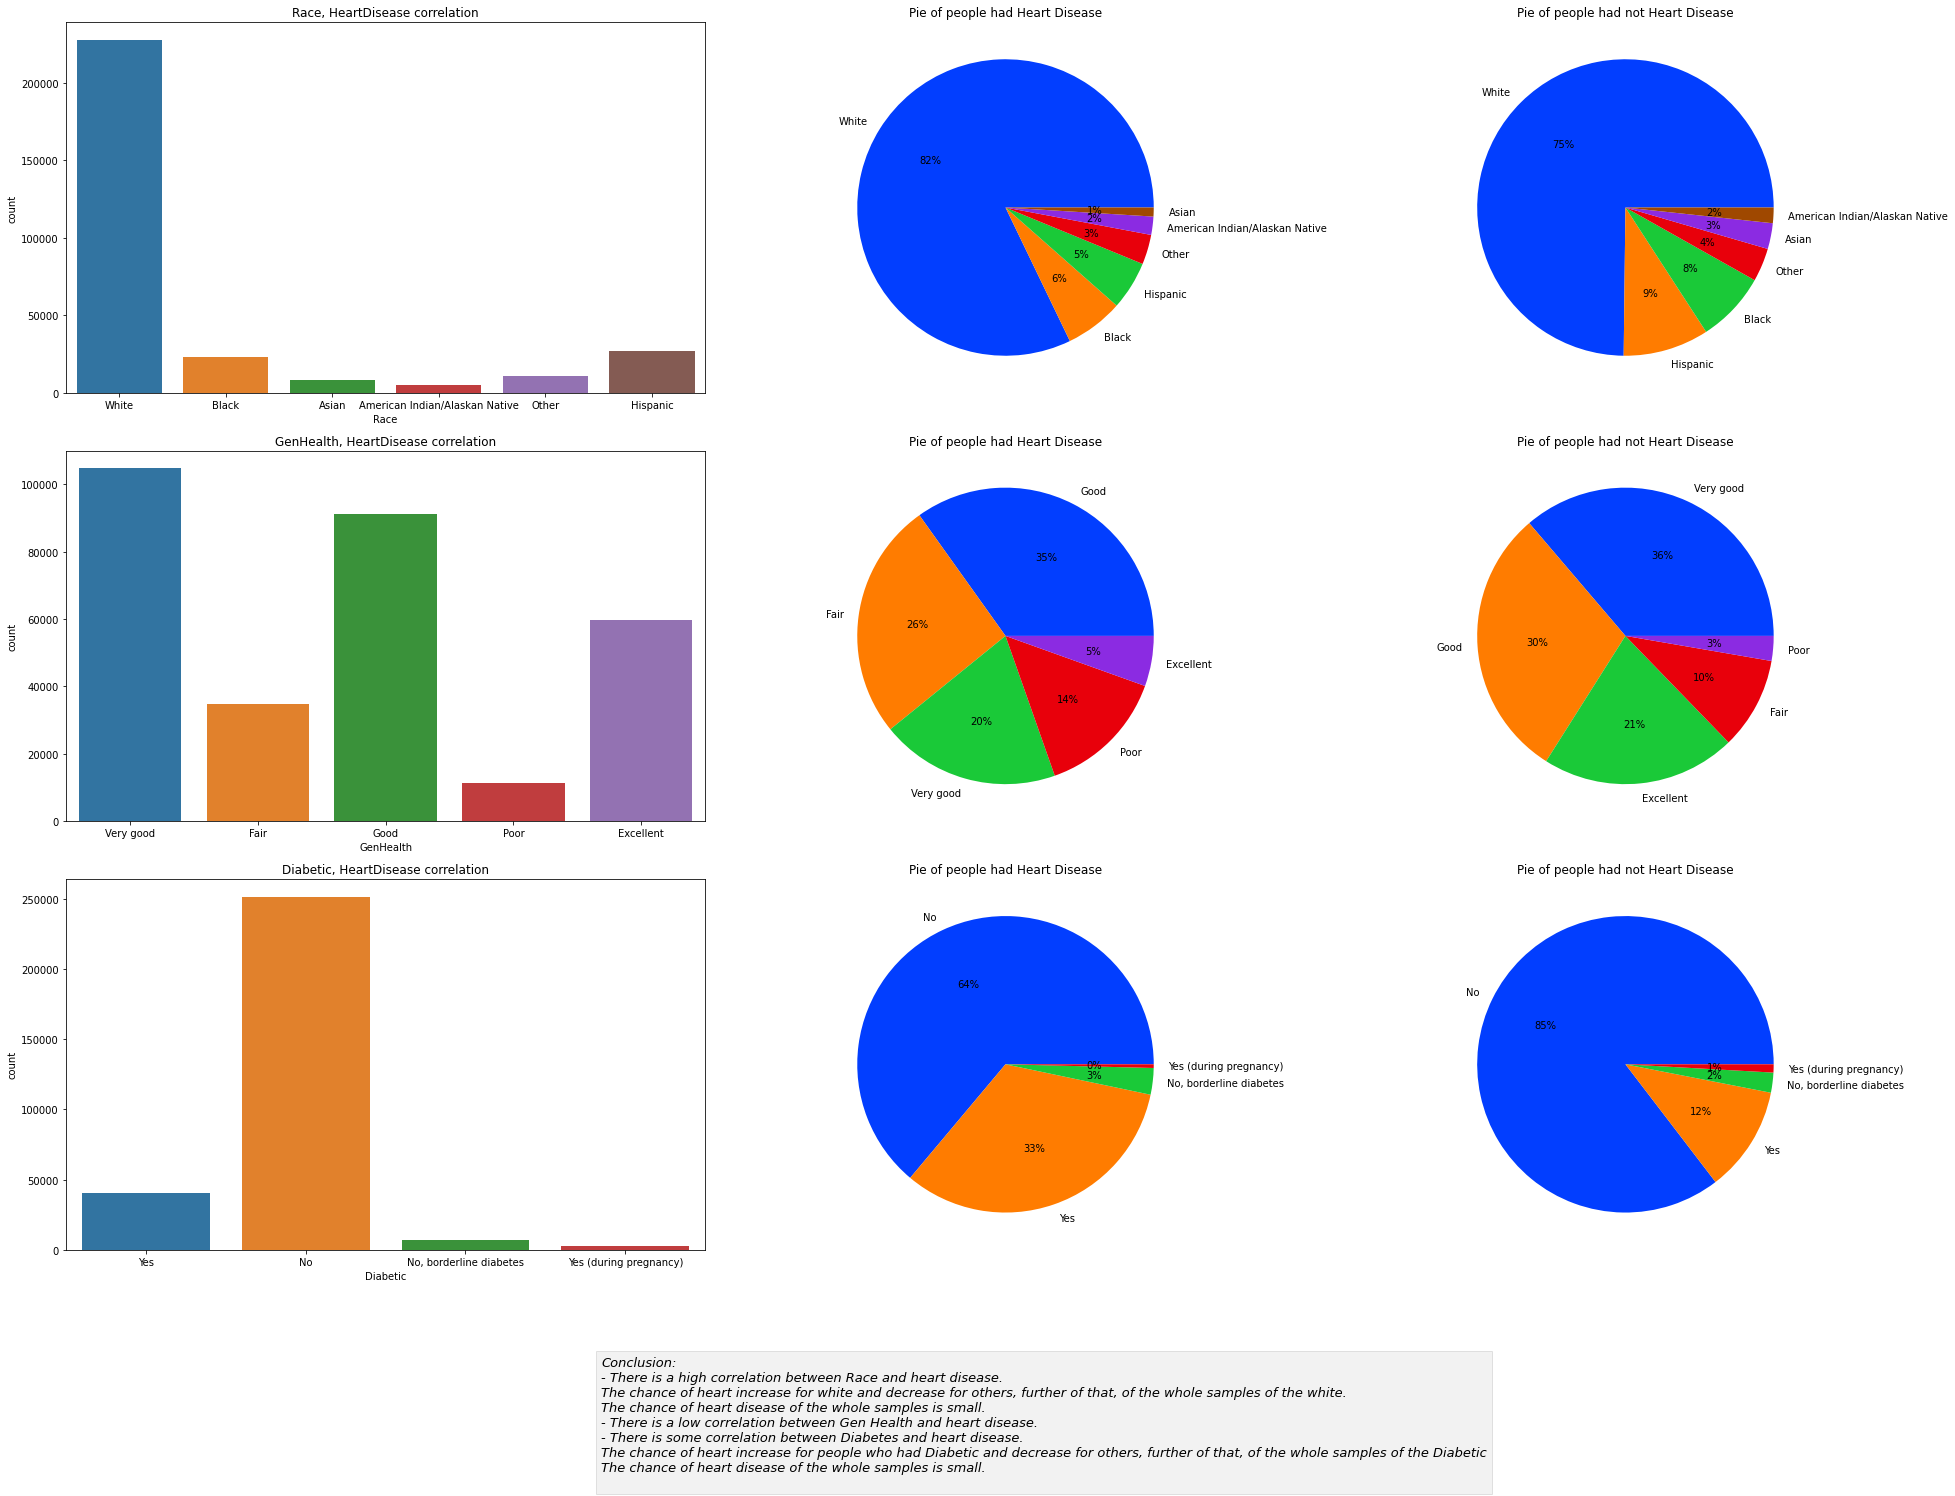

In [ ]:
x_axis_data = ['Race', 'GenHealth', 'Diabetic']
sns_count_plot(x_axis_data, y_axis_data, data, figsize= (28, 18))
# add results
text= '''Conclusion:
- There is a high correlation between Race and heart disease. \nThe chance of heart increase for white and decrease for others, further of that, of the whole samples of the white.\nThe chance of heart disease of the whole samples is small.
- There is a low correlation between Gen Health and heart disease.
- There is some correlation between Diabetes and heart disease.\nThe chance of heart increase for people who had Diabetic and decrease for others, further of that, of the whole samples of the Diabetic\nThe chance of heart disease of the whole samples is small.
'''
plt.gcf().text(0.3, -0.15, s = text, style ='italic',\
          size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
plt.show()

some columns are large, so I will explain them separately

In [ ]:
def sns_count_plot_with_hue(x_axis_data, y_axis_data, data, figsize= (10, 8)):
    '''
    Inputs parametes- takes x_axis_data as a list of the x axis, y_axis_data as a list of y axis, data as data frame, and figsize as a tuple.
    Returns- plots countplot taking hue into consideration and describes the correlation between features of data using Seaborn library.  
    '''
    i_sub= int(len(x_axis_data))
    # create blank figure
    fig, ax = plt.subplots(i_sub, 1, figsize= figsize)
    # initialize subplots indexes values
    i=0; j= 0
    for x_axis in x_axis_data:
        # plot countplot using seaborn
        sns.countplot(x= x_axis, hue= y_axis_data, data= data, ax= ax[i])
        ax[i].set_title(f"{x_axis} taken {y_axis_data} into consideration")
        # set x and y labels
        ax[i].set_xlabel(x_axis)
        # check and update indexes
        i+=1
    # adjust space
    plt.tight_layout()
    return None

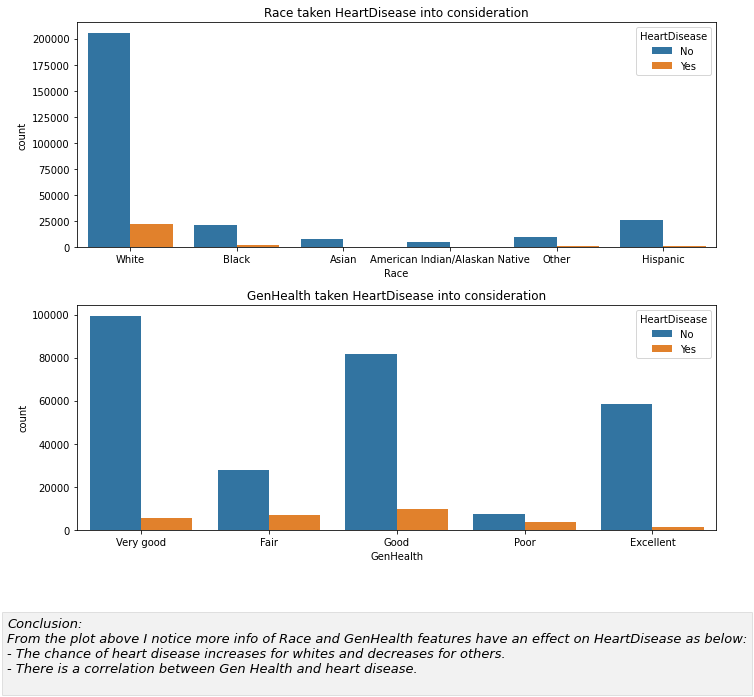

In [ ]:
x_axis_data = ['Race', 'GenHealth']
y_axis_data = 'HeartDisease'
sns_count_plot_with_hue(x_axis_data, y_axis_data, data)
# add results
text= '''Conclusion:
From the plot above I notice more info of Race and GenHealth features have an effect on HeartDisease as below:
- The chance of heart disease increases for whites and decreases for others.
- There is a correlation between Gen Health and heart disease.
'''
plt.gcf().text(0, -0.2, s = text, style ='italic',\
          size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
plt.show()

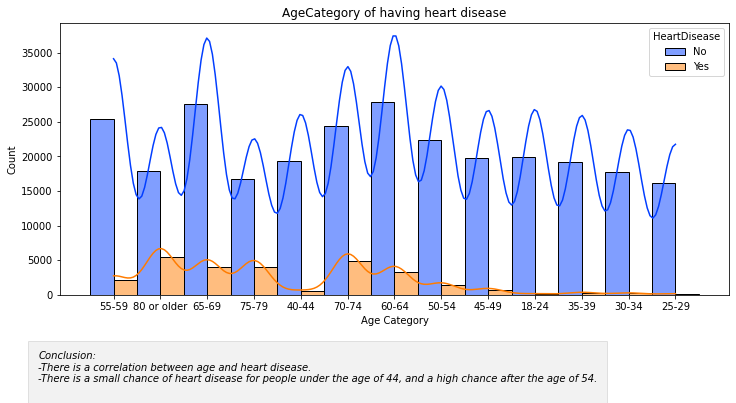

In [ ]:
# create blank figure
fig = plt.figure(figsize= (12, 5))
# plot histogram using seaborn
sns.histplot(x= 'AgeCategory', data= data, hue= 'HeartDisease', kde= True, multiple='dodge', palette= 'bright')
plt.title('AgeCategory of having heart disease')
# add results
text= '''Conclusion:
-There is a correlation between age and heart disease.
-There is a small chance of heart disease for people under the age of 44, and a high chance after the age of 54.
'''
# set x and y labels
plt.xlabel('Age Category')
# set text bellow the plot
plt.gcf().text(0.1, -0.15,\
         s = text,\
            style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

plt.show()

## Plotting pairplot that can give me an idea of all attributes after I started exploring each pair independently

<Figure size 1800x1800 with 0 Axes>

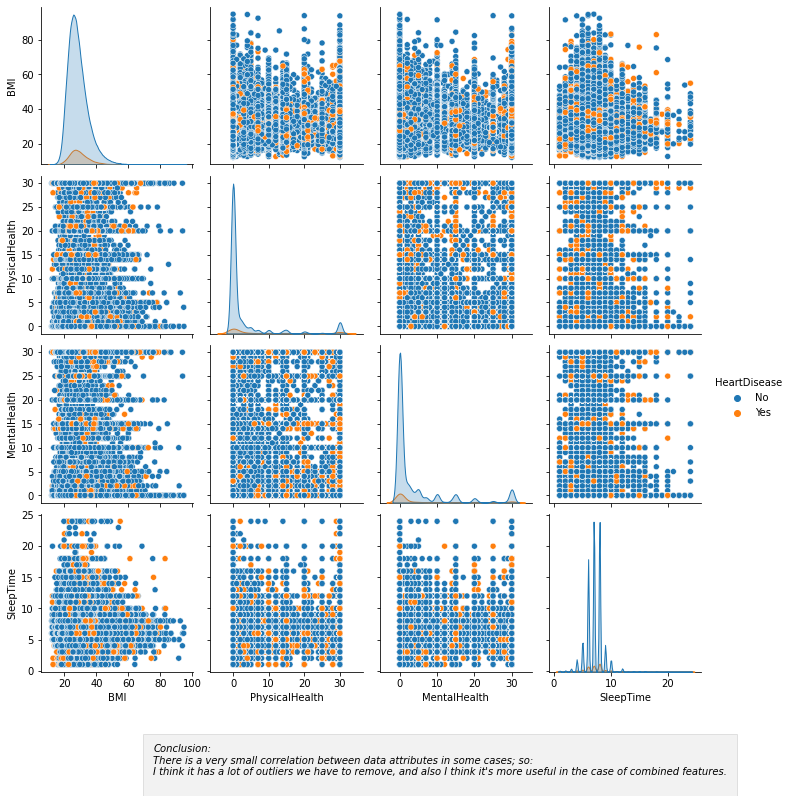

In [ ]:
# create blank figure
fig = plt.figure(figsize=(25,25))

# plot pairplot using seaborn between data features
sns.pairplot(data= data, hue='HeartDisease')

# add results
text= '''Conclusion:
There is a very small correlation between data attributes in some cases; so:
I think it has a lot of outliers we have to remove, and also I think it's more useful in the case of combined features.
'''
plt.gcf().text(0.2, -0.1,\
          s = text,\
          style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})
plt.show()

## Plotting jointplot that can give me more ideas of all attributes after I started exploring each pair independently

In [ ]:
def sns_corr_joint_plot(x_axis_data, y_axis_data, data):
    '''
    Inputs parameters- takes x_axis_data as a list of x axis, y_axis_data as a list of y axis, data as dataframe.
    Returns- plots jointplot of the correlation between features of data using seaborn library.
    '''
    i_sub= int(np.ceil((len(x_axis_data) + len(y_axis_data))/2))
    j_sub= 2
    # create blank figure
    fig = plt.figure()
    # initialize subplots indexes values
    i=0; j= 0
    for x_axis in x_axis_data:
        for y_axis in y_axis_data:
            # check if the axes are equivalent
            if x_axis == y_axis:
                continue
            else:
                # plot jointplot using seaborn
                sns.jointplot(x= x_axis, y= y_axis, data= data, hue= 'HeartDisease')
                # set x and y labels
                plt.xlabel(x_axis)
                plt.ylabel(y_axis)
    # add results
    text= '''
    Conclusion:
    There is a very small correlation between data and it's not clear to understand in a lot of cases; so:
    These plots describe the distribution of data and the intersaction between them.
    '''
    plt.gcf().text(0.3, -0.2, s = text, style ='italic',\
                  size= 13, bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 5})
    plt.tight_layout(h_pad = 0.4)
    return None

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


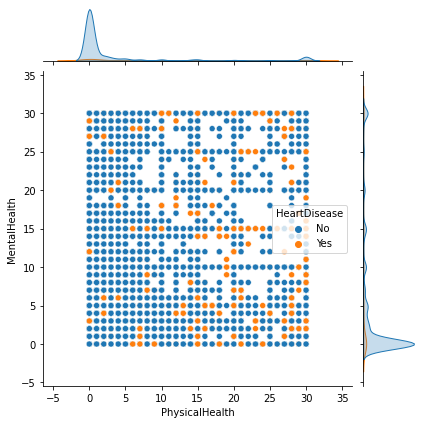

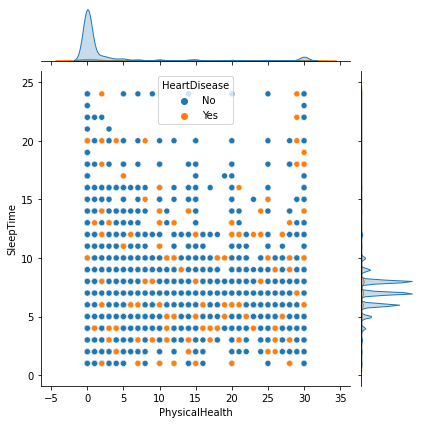

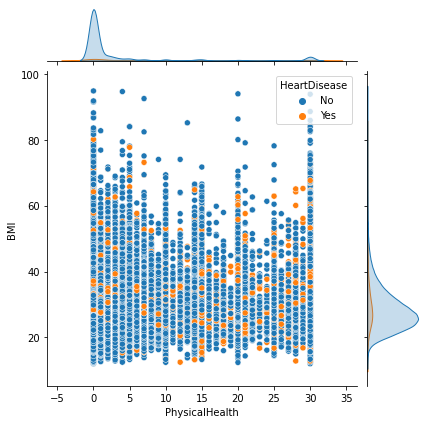

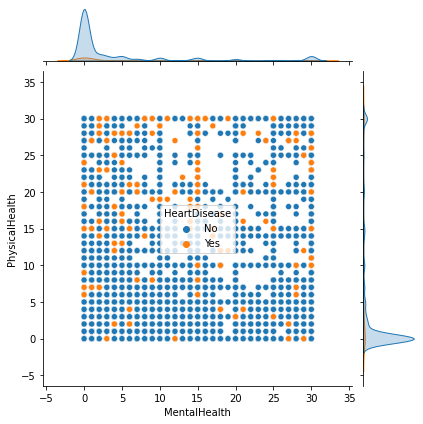

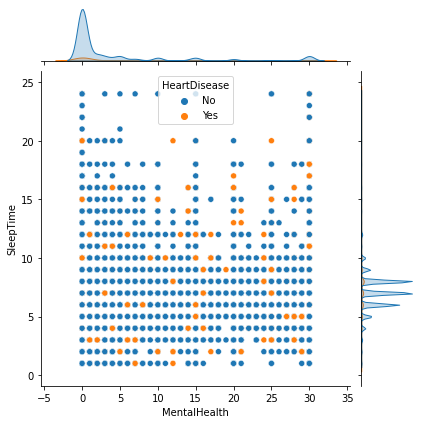

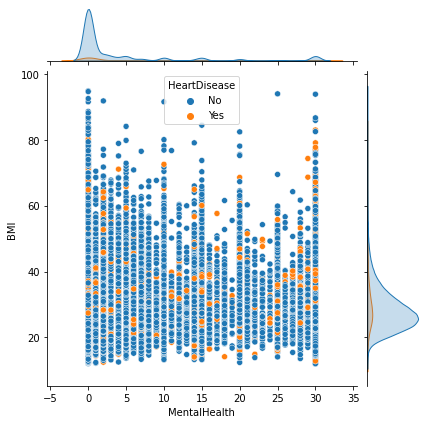

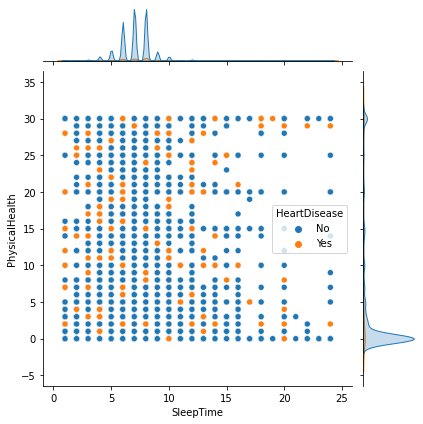

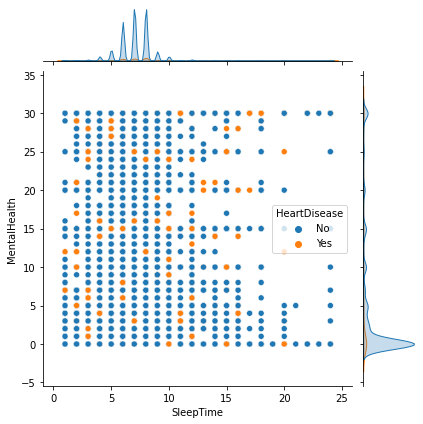

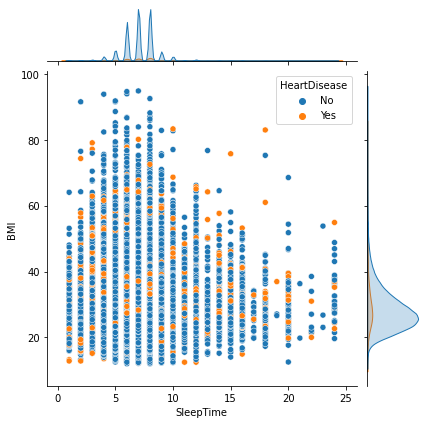

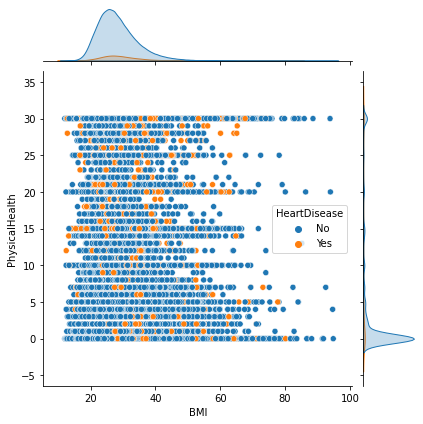

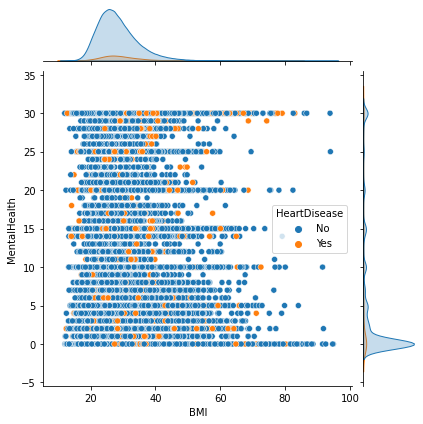

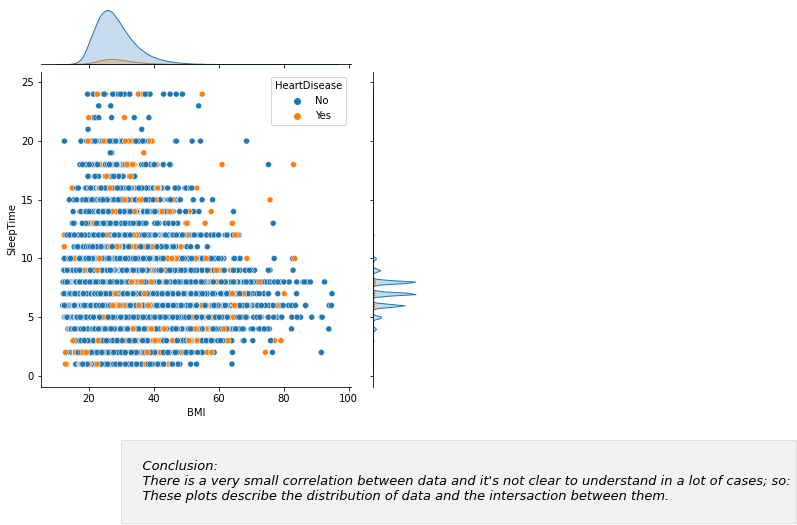

In [ ]:
x_axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
y_axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
sns_corr_joint_plot(x_axis_data, y_axis_data, data)
plt.show()

## Plotting heatmap that can give me more ideas of all attributes after I started exploring each pair independently

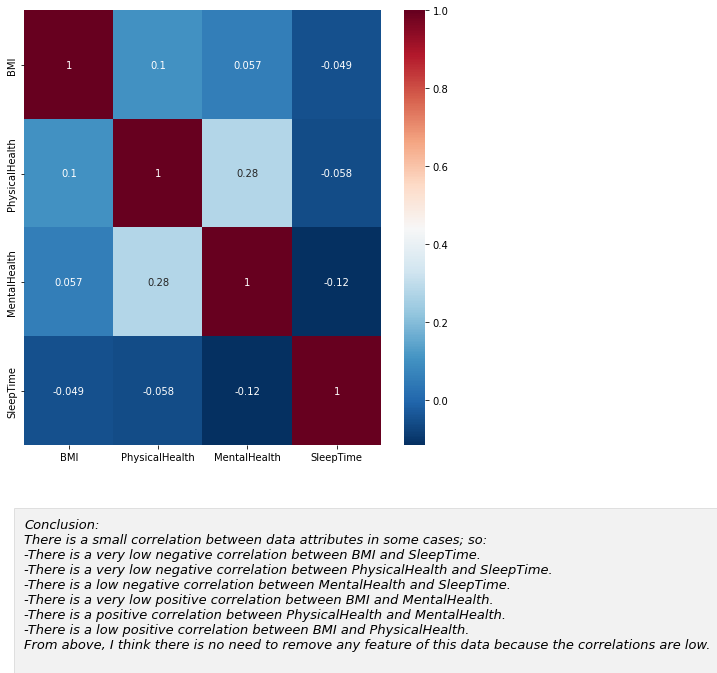

In [ ]:
# create blank figure
fig = plt.figure(figsize=(8, 8))

# plot heatmap using seaborn between data features (numerical data)
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r')

# add results
text= '''Conclusion:
There is a small correlation between data attributes in some cases; so:
-There is a very low negative correlation between BMI and SleepTime.
-There is a very low negative correlation between PhysicalHealth and SleepTime.
-There is a low negative correlation between MentalHealth and SleepTime.
-There is a very low positive correlation between BMI and MentalHealth.
-There is a positive correlation between PhysicalHealth and MentalHealth.
-There is a low positive correlation between BMI and PhysicalHealth.
From above, I think there is no need to remove any feature of this data because the correlations are low.
'''
plt.text(0, 6,\
         s = text,\
            size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})
plt.show()

In [ ]:
def sns_box_plot(x_axis_data, data):
    '''
    Input parameters- takes x_axis_data as a list of x axis, data as dataframe.
    Returns- plot boxplot that describe the correlation between features of data using Seaborn library.
    '''
    i_sub= int(np.ceil(len(x_axis_data)/2))
    j_sub= 2
    # create blank figure
    fig, ax = plt.subplots(i_sub, j_sub)
    # initialize subplots indexes values
    i=0; j= 0
    for x_axis in x_axis_data:
        # plot boxplot using seaborn
        sns.boxplot(x= x_axis, data= data, ax= ax[i, j])
        ax[i, j].set_title(f"Distribution of {x_axis}")
        # set x and y labels
        ax[i, j].set_xlabel('Distribution')
        # check and update indexes
        if j == j_sub - 1:
            j = 0
            i += 1
        else:
            j += 1
    # add results
    text= '''
    Here I can see the distribution of data in all numerical columns, and also the outlier points.
    Also, I can use equations to specify this data to remove it.
    '''
    plt.gcf().text(0, -0.2,\
             s = text,\
                size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    # adjust space
    plt.tight_layout()
    return None

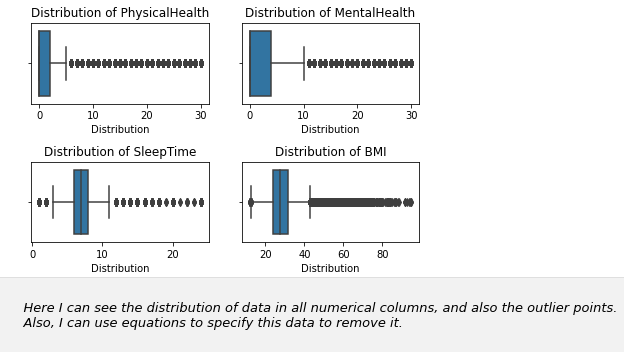

In [ ]:
x_axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
sns_box_plot(x_axis_data, data)

## Plotting kdeplot that can give me more ideas of all attributes after I started exploring each pair independently

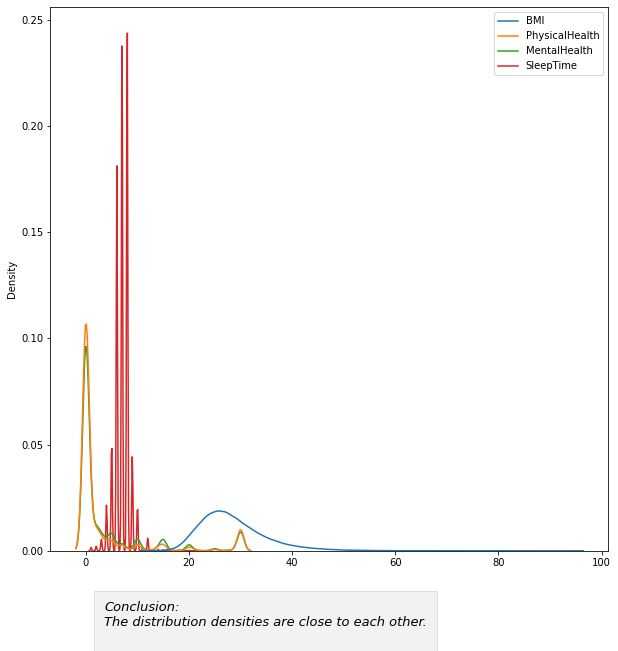

In [ ]:
# create blank figure
fig = plt.figure(figsize= (10, 10))

# plot kdeplot using seaborn
sns.kdeplot(data= data)

# add results
text= '''Conclusion:
The distribution densities are close to each other.
'''
plt.gcf().text(0.2, 0,\
             s = text,\
                size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})
plt.show()

### Here is some additional information about kde and box plot taken Heart Disease in consideration

In [ ]:
def sns_box_plot_with_hue(axis_data, data, hue):
    '''
    Input parameters- takes x_axis_data as a list of x axis, data as dataframe.
    Returns- plots boxplot that describe the correlation between features of data using Seaborn library taken Heart Disease into consideration.
    '''
    i_sub= int(np.ceil(len(axis_data)/2))
    j_sub= 2
    # create blank figure
    fig, ax = plt.subplots(i_sub, j_sub, figsize= (10, 10))
    # initialize subplots indexes values
    i=0; j= 0
    for y_axis in axis_data:
        # plot boxplot using seaborn
        sns.boxplot(x= hue, y= y_axis, data= data, ax= ax[i, j], orient= 'v')
        ax[i, j].set_title(f"Distribution of {y_axis}\n taken heart disease into consideration")
        # check and update indexes
        if j == j_sub - 1:
            j = 0
            i += 1
        else:
            j += 1
    # add results
    text= '''Conclusion:
    Here I can see the distribution of data in all numerical columns taking heart disease into consideration, and also the outlier points,
    PhysicalHealth had a high effect on data and had low outlier data points.
    '''
    plt.gcf().text(0, -0.1,\
             s = text,\
                size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    # adjust space
    plt.tight_layout()
    return None

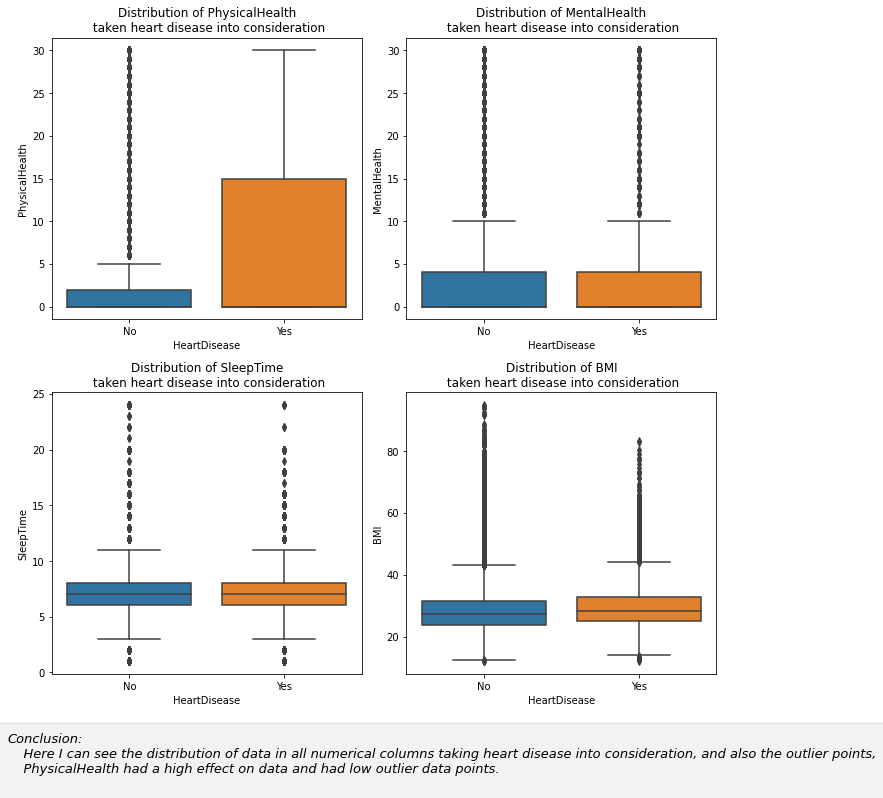

In [ ]:
axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
sns_box_plot_with_hue(axis_data, data, 'HeartDisease')

In [ ]:
def kdeplot_with_hue(axis_data, data, hue):
    '''
    Input parameters- takes x_axis_data as a list of x axis, data as dataframe.
    Returns- plots kdeplot that describe the correlation between features of data using Seaborn library taken Heart Disease into consideration.
    '''
    i_sub= int(np.ceil(len(axis_data)/2))
    j_sub= 2
    # create blank figure
    fig, ax = plt.subplots(i_sub, j_sub, figsize= (10, 10))
    # initialize subplots indexes values
    i=0; j= 0
    for x_axis in axis_data:
        # plot kdeplot using seaborn
        sns.kdeplot(x= x_axis, data= data, ax= ax[i, j], hue= hue)
        ax[i, j].set_title(f"Distribution of {x_axis}\n taken heart disease into consideration")
        # check and update indexes
        if j == j_sub - 1:
            j = 0
            i += 1
        else:
            j += 1
    # add results
    text= '''Conclusion:
    Here I can see the density distribution of data in all numerical columns taking heart disease into consideration.
    '''
    plt.gcf().text(0, -0.1,\
             s = text,\
                size= 13, style ='italic', bbox={'facecolor': 'grey', 'alpha': 0.1, 'pad': 10})

    # adjust space
    plt.tight_layout()
    return None

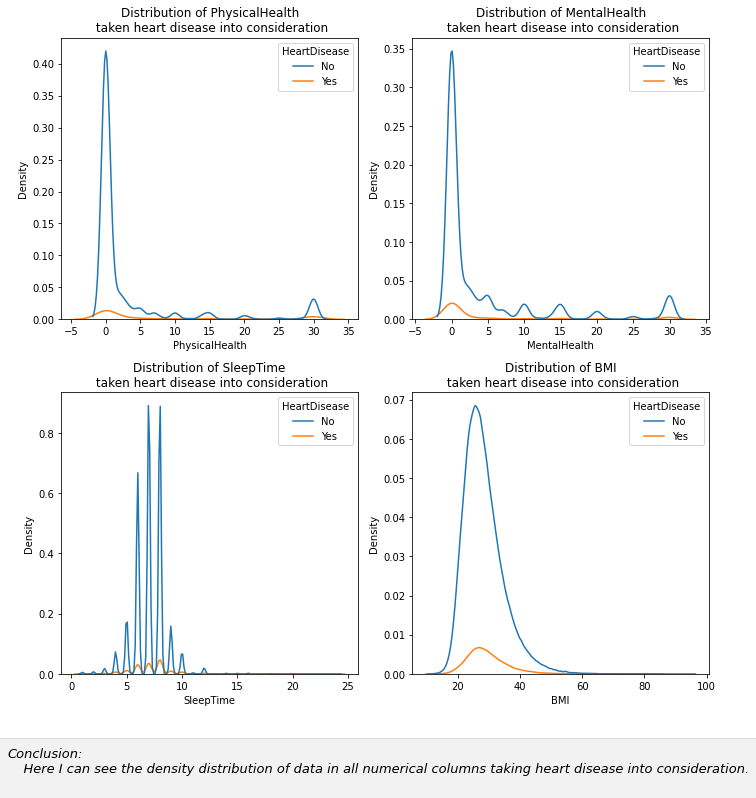

In [ ]:
axis_data = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
kdeplot_with_hue(axis_data, data, hue= 'HeartDisease')

## Final conclusion about Heart Disease:
    * BMI has a noise effect in the most of cases of data, and a slightly effect on Heart Disease.
    * Smoking has a slight effect to be causing of Heart Disease.
    * Alcohol has a slight effect to be causing of Heart Disease.
    * Stroke has a high effect to be causing of Heart Disease.
    * Difficulty in walking has a high effect to be causing of Heart Disease.
    * Sex has a slight effect to be causing of Heart Disease, therefor the chance of heart disease for male increase a little bit other than female.
    * Physical Activity has some effect to be causing of Heart Disease.
    * Asthma has some effect to be causing of Heart Disease.
    * kidney disease has a high effect to be causing of Heart Disease.
    * Skin Cancer has a high effect to be causing of Heart Disease.
    * Race has a high effect to be causing of Heart Disease if race is white.
    * Gen Health has a high effect to be causing of Heart Disease if Gen Health is very good or good or excellent.
    * Diabetic has a high effect to be causing of Heart Disease if the people have no diabetic.
    * Age has a high effect to be causing of Heart Disease if people age is more than the age of 54.